In [1]:
# 1. Create a simple quantum program called a 'quantum circuit'.
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, [1, 2])
qc.measure_all()

# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
#    If you're running this example locally, you need to load your
#    account with your IBM Quantum API token

import os
from dotenv import load_dotenv

load_dotenv()

MY_ENV_VAR = os.getenv("IBM_TOKEN")



In [2]:
import os
key = os.environ.get('IBM_TOKEN')

from qiskit import IBMQ

IBMQ.save_account(token=key,overwrite=True)
IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:

from qiskit.providers.ibmq import IBMQ, least_busy
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')


Running on ibmq_belem


Job Status: job has successfully run


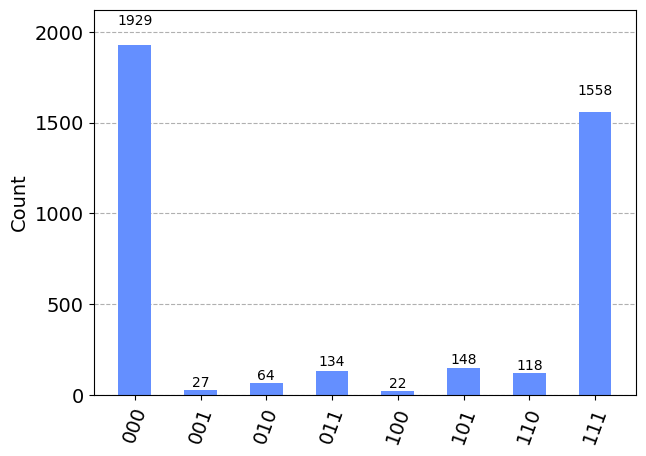

In [4]:
# 3. Convert the program to a form the device can run.
#    This is known as 'transpiling'
from qiskit import transpile
transpiled_qc = transpile(qc, device)

# 4. Send the program off to IBM Quantum to run on a real device
#    and monitor its status.
from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

# 5. Plot the results as a histogram.
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())